In [23]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np

In [24]:
coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree))
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
r

INFO: Query finished. [astroquery.utils.tap.core]


dist,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,fl

In [25]:
planet_location = EarthLocation(lat=45*u.deg, lon=120*u.deg, height=0*u.m)

In [26]:
obstime = Time.now()

In [27]:
azimuths = []
altitudes = []

In [28]:
for star in r:
    star_location = SkyCoord(ra=star['ra'], dec=star['dec'], unit=(u.degree, u.degree))
    star_altaz = star_location.transform_to(AltAz(obstime=obstime, location=planet_location))
    azimuths.append(star_altaz.az)
    altitudes.append(star_altaz.alt)

In [29]:
r['azimuth'] = azimuths
r['altitude'] = altitudes

In [30]:
print(azimuths)
print(r['dist'])

[<Longitude 145.71840141 deg>, <Longitude 145.70605188 deg>, <Longitude 145.70997098 deg>, <Longitude 145.69989217 deg>, <Longitude 145.69909552 deg>, <Longitude 145.72834853 deg>, <Longitude 145.69990288 deg>, <Longitude 145.71486429 deg>, <Longitude 145.71303679 deg>, <Longitude 145.7331131 deg>, <Longitude 145.73123071 deg>, <Longitude 145.73568304 deg>, <Longitude 145.69523986 deg>, <Longitude 145.72573325 deg>, <Longitude 145.74216333 deg>, <Longitude 145.68708195 deg>, <Longitude 145.68436995 deg>, <Longitude 145.68162848 deg>, <Longitude 145.70767539 deg>, <Longitude 145.68622421 deg>, <Longitude 145.74137282 deg>, <Longitude 145.73862423 deg>, <Longitude 145.75358812 deg>, <Longitude 145.6747888 deg>, <Longitude 145.69475784 deg>, <Longitude 145.66999623 deg>, <Longitude 145.74258864 deg>, <Longitude 145.71526331 deg>, <Longitude 145.66890814 deg>, <Longitude 145.71319579 deg>, <Longitude 145.71833701 deg>, <Longitude 145.75750555 deg>, <Longitude 145.67087692 deg>, <Longitude 

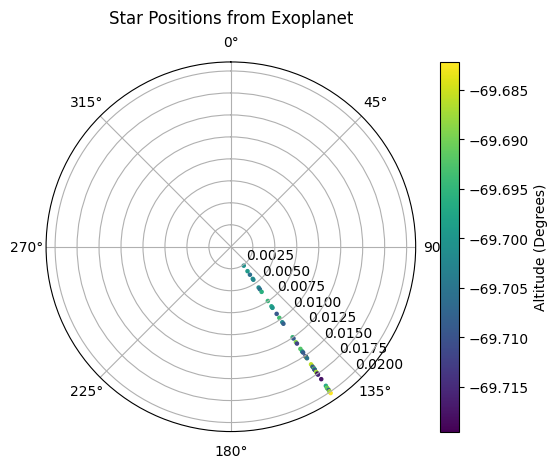

In [31]:
azimuth_rad = np.radians(r['azimuth'])
altitude_deg = r['altitude']
distance = r['dist']
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#altitude_inverted = 90 - altitude_deg
scatter = ax.scatter(azimuth_rad, distance, c=altitude_deg, cmap='viridis', s=5)
cbar = plt.colorbar(scatter)
cbar.set_label('Altitude (Degrees)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(135)
ax.set_title('Star Positions from Exoplanet', va='bottom')

plt.show()